In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
plt.rcParams.update({'font.size': 15}) 

## Leaky Intergrate and Fire model:

$$\dot v_i(t) = -v_i(t) + \frac{1}{N}\sum_{j = 1}^NJ_{ij}s_{ij}(t) g(v_i - E) + I_i$$

$$\dot s_{ij}(t) = -\beta s_{ij}(t) + \alpha(1-s_{ij}(t))$$

$$\text{when } v >= 30 \rightarrow v(t) = -40 \text{, and }s(t) = s(t) + u$$

Here $v_i$ is a membrane potential of $i$-neuron, $s_{ij}$ is a synaptic inputs to $i$-neuron from $j$-neuron.  The network has a topology of $\mathbf{J}$. We sum synaptic inputs for $i$-neuron through all connections $j = 1..N$, $N$ --  the number of neurons. The expression $\sum_{j = 1}^NJ_{ij}s_{ij} g(v_i - E)$ gives a synaptic current. $E$ is a reversive potential (like Nernst potential that you calculate in the first task). $I_i$ is the external current for $i$-neuron.

In [3]:
def LIF(v, s, I, J, g, E, beta, alpha):
    
    dv = -v + I + 1 / N * g * J.dot(v - E).dot(s)
    ds = -beta * s + alpha * (1 - s)
    return dv, ds


### Euler Scheme for integration:

In [4]:
def run(v0, s0, u, args, T, STEP):
    v = [v0]
    s = [s0]
    spikes_all = []
    
    for t in np.arange(0, T, STEP):    

        spikes = v[-1] >= 30

        v[-1][spikes] = -40    
        s[-1] += spikes * u

        dv, ds = LIF(v[-1], s[-1], *args)
        v.append(v[-1] + dv * STEP)
        s.append(s[-1] + ds * STEP)
        spikes_all.append(spikes)
        
    return np.array(v), np.array(s)

In [5]:
STEP = 1e-1
T = 100

N = 100
v0 = np.random.rand(N) * 40 - 30 
s0 = np.random.rand(N)

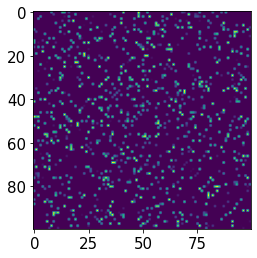

In [6]:
G = nx.erdos_renyi_graph(N, 0.1)
for (u,v,w) in G.edges(data=True):
    w['weight'] = np.random.randint(0, 100) * 0.01 

J = np.array(nx.adjacency_matrix(G).todense()) 

plt.figure()
plt.imshow(J)
plt.show()

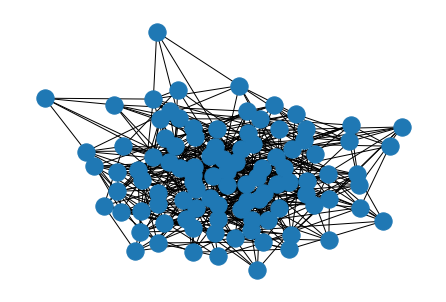

In [7]:
nx.draw(G)

In [8]:
# Parameters for neurons:
I = np.random.randn(N) * 40
g = 1
E = -30

# Parameteres for synapses:
beta = 1
alpha = 1 - beta
u = 0.5

# Put all arguments together:
args = (I, J, g, E, beta, alpha)

# Run dynamics:
v, s = run(v0, s0, u, args, T, STEP)

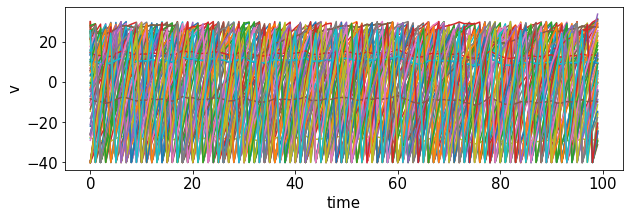

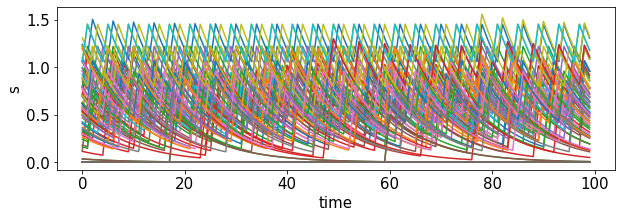

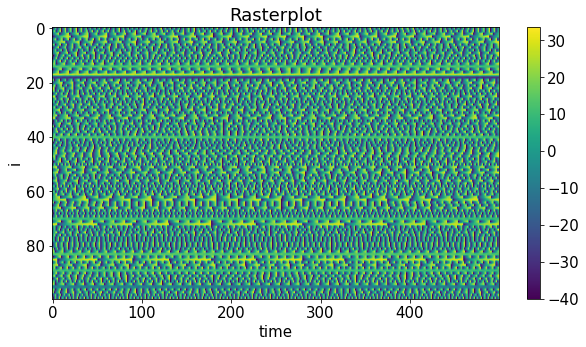

In [9]:
plt.figure(figsize=(10, 3))
plt.plot(v[-100:])
plt.ylabel('v')
plt.xlabel('time')
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(s[-100:])
plt.ylabel('s')
plt.xlabel('time')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(v[-500:].T, aspect='auto')          
plt.ylabel('i')
plt.xlabel("time")
plt.title('Rasterplot')
plt.colorbar()
plt.show()